In [1]:
# import python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("DA Assignment.xlsx")
df.head()

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Id                                                      16476 non-null  int64         
 1   Requester id                                            16476 non-null  int64         
 2   Group                                                   16476 non-null  object        
 3   Status                                                  16476 non-null  object        
 4   Priority                                                16476 non-null  object        
 5   Via                                                     16476 non-null  object        
 6   Created at                                              16476 non-null  datetime64[ns]
 7   Updated at                                              16

In [4]:
df.drop(['Id','Requester id'],axis=1,inplace=True)

In [5]:
df.shape

(16476, 21)

In [6]:
print("The number of columns is ",df.shape[1])
print("The number of rows is ",df.shape[0])

The number of columns is  21
The number of rows is  16476


In [7]:
df.describe()

,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours
count,16476,16476,16347,16347,14409,14409.000000,16476.000000,16476.000000,12760.000000,14834.000000,14834.000000,14409.000000,14409.000000,16327.000000,16327.000000
mean,2023-05-01 06:50:28.721776896,2023-05-27 03:16:13.368536320,2023-05-03 21:48:01.163516416,2023-05-03 06:29:41.244264960,2023-05-09 05:58:24.318134528,205.246235,0.242899,2.152525,1852.113950,10177.772752,5131.839693,12314.136304,6196.644320,10443.141238,5259.864213
min,2023-04-01 00:31:00,2023-04-02 21:35:00,2023-04-01 10:03:00,2023-04-01 10:03:00,2023-04-01 12:17:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-15 07:00:00,2023-05-16 06:10:00,2023-04-17 19:35:00,2023-04-17 15:17:00,2023-04-21 14:59:00,22.000000,0.000000,1.000000,122.000000,916.250000,437.000000,1340.000000,652.000000,936.000000,491.000000
50%,2023-05-01 07:00:00,2023-06-01 00:43:00,2023-05-03 19:32:00,2023-05-03 10:38:00,2023-05-10 08:53:00,96.000000,0.000000,1.000000,478.000000,4299.000000,2154.000000,5751.000000,2880.000000,4238.000000,2126.000000
75%,2023-05-17 07:00:00,2023-06-07 14:01:30,2023-05-19 09:24:00,2023-05-18 14:23:00,2023-05-25 11:22:00,259.000000,0.000000,3.000000,1935.250000,12085.750000,6178.750000,15559.000000,7847.000000,12176.000000,6212.000000
max,2023-05-31 23:43:00,2023-06-19 08:47:00,2023-06-16 19:01:00,2023-06-16 18:47:00,2023-06-19 08:47:00,1805.000000,11.000000,36.000000,52770.000000,108322.000000,54322.000000,108322.000000,54322.000000,108942.000000,54355.000000
std,NaN,NaN,NaN,NaN,NaN,283.541651,0.705320,2.681740,3916.902674,15243.191721,7625.355098,17012.495327,8504.443833,15858.506931,7917.994694


In [8]:
round(df.describe(),2).T

,count,mean,min,25%,50%,75%,max,std
Created at,16476,2023-05-01 06:50:28.721776896,2023-04-01 00:31:00,2023-04-15 07:00:00,2023-05-01 07:00:00,2023-05-17 07:00:00,2023-05-31 23:43:00,NaN
Updated at,16476,2023-05-27 03:16:13.368536320,2023-04-02 21:35:00,2023-05-16 06:10:00,2023-06-01 00:43:00,2023-06-07 14:01:30,2023-06-19 08:47:00,NaN
Assigned at,16347,2023-05-03 21:48:01.163516416,2023-04-01 10:03:00,2023-04-17 19:35:00,2023-05-03 19:32:00,2023-05-19 09:24:00,2023-06-16 19:01:00,NaN
Initially assigned at,16347,2023-05-03 06:29:41.244264960,2023-04-01 10:03:00,2023-04-17 15:17:00,2023-05-03 10:38:00,2023-05-18 14:23:00,2023-06-16 18:47:00,NaN
Solved at,14409,2023-05-09 05:58:24.318134528,2023-04-01 12:17:00,2023-04-21 14:59:00,2023-05-10 08:53:00,2023-05-25 11:22:00,2023-06-19 08:47:00,NaN
Resolution time,14409.0,205.25,0.0,22.0,96.0,259.0,1805.0,283.54
Reopens,16476.0,0.24,0.0,0.0,0.0,0.0,11.0,0.71
Replies,16476.0,2.15,0.0,1.0,1.0,3.0,36.0,2.68
First reply time in minutes within business hours,12760.0,1852.11,0.0,122.0,478.0,1935.25,52770.0,3916.9
First resolution time in minutes,14834.0,10177.77,0.0,916.25,4299.0,12085.75,108322.0,15243.19


In [9]:
df.columns

Index(['Group', 'Status', 'Priority', 'Via', 'Created at', 'Updated at',
       'Assigned at', 'Initially assigned at', 'Solved at', 'Resolution time',
       'Satisfaction Score', 'Reopens', 'Replies',
       'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours',
       'Manual Tagging of Categories [list]'],
      dtype='object')

In [10]:
df.isnull().sum()

Group                                                         0
Status                                                        0
Priority                                                      0
Via                                                           0
Created at                                                    0
Updated at                                                    0
Assigned at                                                 129
Initially assigned at                                       129
Solved at                                                  2067
Resolution time                                            2067
Satisfaction Score                                        11023
Reopens                                                       0
Replies                                                       0
First reply time in minutes within business hours          3716
First resolution time in minutes                           1642
First resolution time in minutes within 

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"The {column.upper()} has : {df[column].nunique()} unique values")
        print(df[column].value_counts())
        print()

The GROUP has : 4 unique values
Group
Endorsements            6449
Support                 5670
Reimbursement Claims    3827
Onboardings              530
Name: count, dtype: int64

The STATUS has : 6 unique values
Status
Closed     12270
Solved      2139
Hold         790
Pending      681
Open         470
New          126
Name: count, dtype: int64

The PRIORITY has : 3 unique values
Priority
Low       16282
Urgent      182
Normal       12
Name: count, dtype: int64

The VIA has : 4 unique values
Via
Mail                      13081
Internal Communication     2028
OutBound                   1051
Closed Ticket               316
Name: count, dtype: int64

The SATISFACTION SCORE has : 6 unique values
Satisfaction Score
Offered    4640
5           409
4           311
3            64
1            15
2            14
Name: count, dtype: int64

The MANUAL TAGGING OF CATEGORIES [LIST] has : 12 unique values
Manual Tagging of Categories [list]
-                                   13923
Claims        

In [12]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(f"The {column.upper()} has : {df[column].nunique()} unique values")
        print(df[column].value_counts())
        print()

The CREATED AT has : 9806 unique values
Created at
2023-04-18 07:00:00    129
2023-04-14 07:00:00    127
2023-04-27 07:00:00    120
2023-04-19 07:00:00    120
2023-04-25 07:00:00    120
                      ... 
2023-04-11 18:55:00      1
2023-04-11 18:52:00      1
2023-04-11 18:51:00      1
2023-04-11 18:50:00      1
2023-05-31 23:43:00      1
Name: count, Length: 9806, dtype: int64

The UPDATED AT has : 5290 unique values
Updated at
2023-05-20 06:09:00    196
2023-06-07 06:43:00    187
2023-06-07 06:09:00    186
2023-06-07 06:42:00    185
2023-06-06 06:11:00    174
                      ... 
2023-04-17 19:20:00      1
2023-04-17 13:46:00      1
2023-04-21 12:55:00      1
2023-04-17 18:27:00      1
2023-06-01 14:40:00      1
Name: count, Length: 5290, dtype: int64

The ASSIGNED AT has : 9443 unique values
Assigned at
2023-06-07 14:21:00    63
2023-05-15 11:21:00    37
2023-04-14 11:57:00    30
2023-05-16 10:14:00    24
2023-04-24 13:45:00    19
                       ..
2023-04-23 23

In [13]:
df['Satisfaction Score'].fillna(df['Satisfaction Score'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Group                                                        0
Status                                                       0
Priority                                                     0
Via                                                          0
Created at                                                   0
Updated at                                                   0
Assigned at                                                129
Initially assigned at                                      129
Solved at                                                 2067
Resolution time                                           2067
Satisfaction Score                                           0
Reopens                                                      0
Replies                                                      0
First reply time in minutes within business hours         3716
First resolution time in minutes                          1642
First resolution time in minutes within business hours 

In [15]:
df.duplicated().sum()

123

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.columns

Index(['Group', 'Status', 'Priority', 'Via', 'Created at', 'Updated at',
       'Assigned at', 'Initially assigned at', 'Solved at', 'Resolution time',
       'Satisfaction Score', 'Reopens', 'Replies',
       'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours',
       'Manual Tagging of Categories [list]'],
      dtype='object')

In [19]:
df_1 = df.copy()

In [20]:
df_1.rename(columns={'First reply time in minutes within business hours':'FRPTIMWBH',
                       'First resolution time in minutes':'FRPTIM',
                       'First resolution time in minutes within business hours':'FRSTIMWBH',
                       'Full resolution time in minutes':'FRSTIM',
                       'Full resolution time in minutes within business hours':'FRTIMWBH',
                       'Requester wait time in minutes':'RWTIM',
                       'Requester wait time in minutes within business hours':'RWTIMWBH',
                       'Manual Tagging of Categories [list]':'MTOC'},inplace=True)

In [21]:
df_1.head()

,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,...,Reopens,Replies,FRPTIMWBH,FRPTIM,FRSTIMWBH,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,MTOC
0,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,2023-06-14 16:30:00,1604.0,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,2023-05-26 16:26:00,765.0,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,2023-05-30 14:56:00,333.0,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,2023-06-15 20:55:00,1522.0,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,2023-05-19 18:25:00,605.0,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


In [25]:
df_1['MTOC'].value_counts()

MTOC
Not Fill                            13800
Claims                                904
Is my treatment covered (IMTC)        678
HR Queries                            266
Others                                159
Manage dependents                     148
Health ID                             131
Health Benefits                        75
Not Applicable                         74
Super Top-up (STU)                     70
Network or Blacklisted Hospitals       28
Telehealth                             20
Name: count, dtype: int64

In [24]:
df_1['MTOC'] = df_1['MTOC'].replace('-','Not Fill')

In [ ]:
#df_1 = pd.get_dummies(df_1,columns=['Group','Status','Priority','Via','Satisfaction Score','MTOC'],drop_first=True,dtype=float)

In [26]:
df_mean = df_1.copy()
df_median = df_1.copy()

In [29]:
df_mean.head()

,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,...,Reopens,Replies,FRPTIMWBH,FRPTIM,FRSTIMWBH,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,MTOC
0,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,2023-06-14 16:30:00,1604.0,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,2023-05-26 16:26:00,765.0,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,Not Fill
2,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,2023-05-30 14:56:00,333.0,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,2023-06-15 20:55:00,1522.0,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,2023-05-19 18:25:00,605.0,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


In [30]:
df_mean.isnull().sum()

Group                       0
Status                      0
Priority                    0
Via                         0
Created at                  0
Updated at                  0
Assigned at                36
Initially assigned at      36
Solved at                1968
Resolution time          1968
Satisfaction Score          0
Reopens                     0
Replies                     0
FRPTIMWBH                3593
FRPTIM                   1543
FRSTIMWBH                1543
FRSTIM                   1968
FRTIMWBH                 1968
RWTIM                      56
RWTIMWBH                   56
MTOC                        0
dtype: int64

In [31]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [32]:
df_mean.isnull().sum()

Group                    0
Status                   0
Priority                 0
Via                      0
Created at               0
Updated at               0
Assigned at              0
Initially assigned at    0
Solved at                0
Resolution time          0
Satisfaction Score       0
Reopens                  0
Replies                  0
FRPTIMWBH                0
FRPTIM                   0
FRSTIMWBH                0
FRSTIM                   0
FRTIMWBH                 0
RWTIM                    0
RWTIMWBH                 0
MTOC                     0
dtype: int64

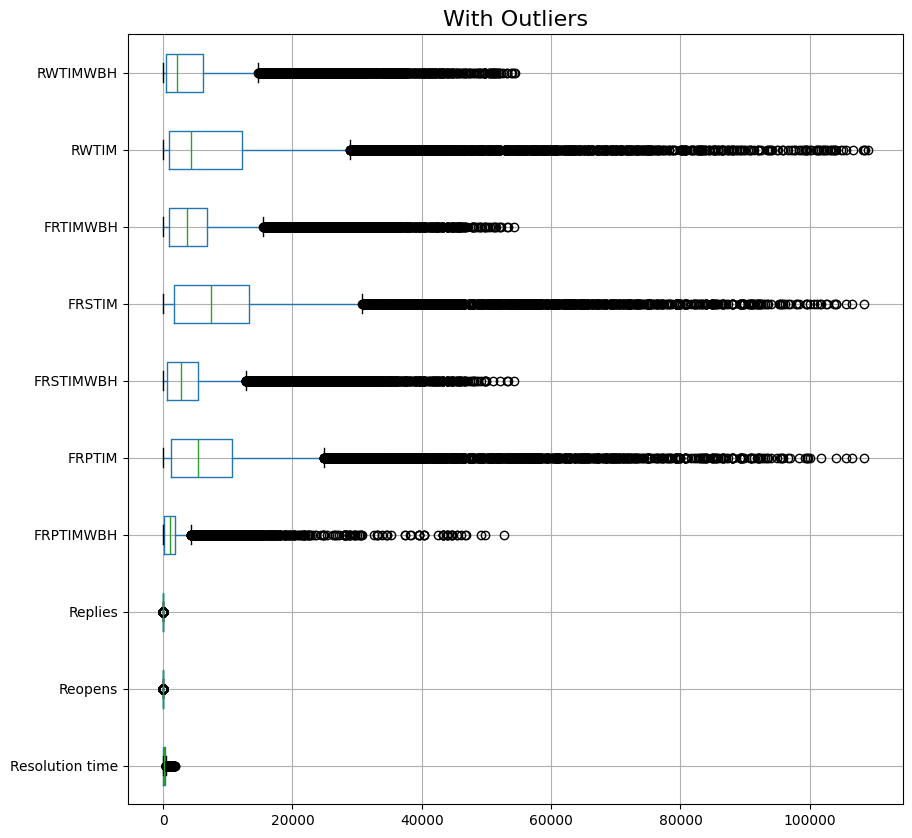

In [33]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [110]:
df_mean.to_csv('df_mean_with_outlier.csv', index=False)

## Oulier Treatment for Mean

In [35]:
df_mean_o = df_mean.copy()

In [36]:
df_mean_o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16353 entries, 0 to 16475
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Group                  16353 non-null  object        
 1   Status                 16353 non-null  object        
 2   Priority               16353 non-null  object        
 3   Via                    16353 non-null  object        
 4   Created at             16353 non-null  datetime64[ns]
 5   Updated at             16353 non-null  datetime64[ns]
 6   Assigned at            16353 non-null  datetime64[ns]
 7   Initially assigned at  16353 non-null  datetime64[ns]
 8   Solved at              16353 non-null  datetime64[ns]
 9   Resolution time        16353 non-null  float64       
 10  Satisfaction Score     16353 non-null  object        
 11  Reopens                16353 non-null  int64         
 12  Replies                16353 non-null  int64         
 13  FRPTIM

In [37]:
def outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

def remove_outlier(data):
    for column in data.drop(['Group','Status','Priority','Via','Reopens','Satisfaction Score','MTOC'],axis=1).columns:
        lr,ur=outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

In [38]:
remove_outlier(df_mean_o)

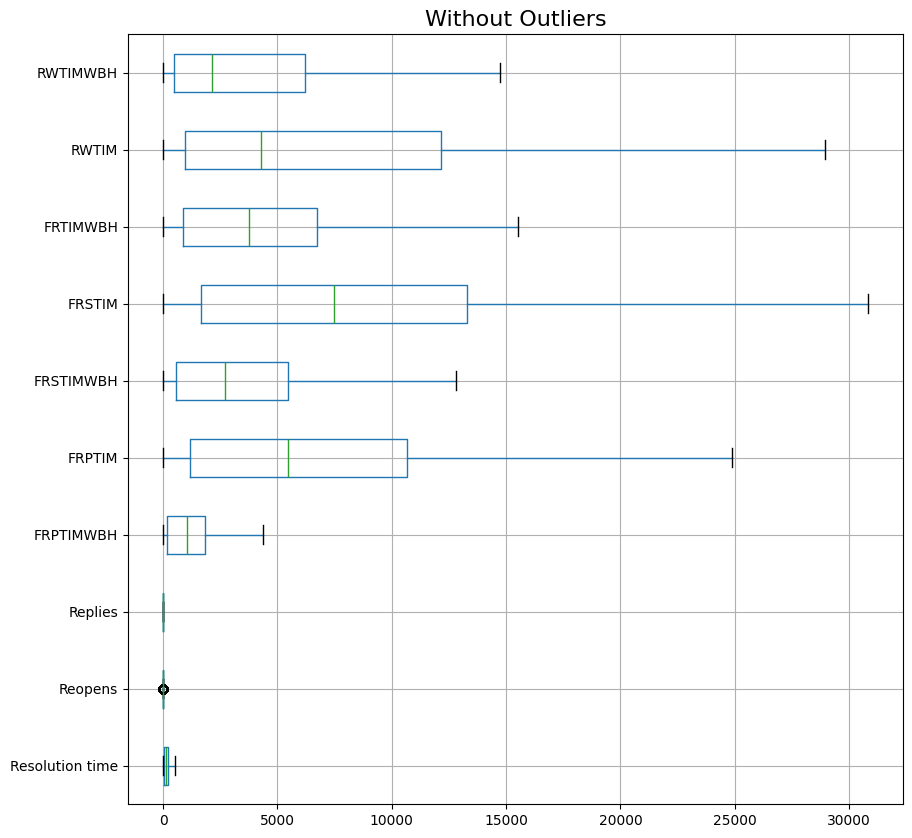

In [39]:
cont=df_mean.dtypes[(df_mean_o.dtypes!='uint8') & (df_mean_o.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean_o[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [40]:
df_mean_o.head()

,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,...,Reopens,Replies,FRPTIMWBH,FRPTIM,FRSTIMWBH,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,MTOC
0,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,2023-06-14 16:30:00,514.5,...,11,6.0,173.0,12975.0,6488.0,30808.5,15526.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,2023-05-26 16:26:00,514.5,...,10,6.0,1527.0,2984.0,1527.0,30808.5,15526.0,28951.5,14738.5,Not Fill
2,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,2023-05-30 14:56:00,333.0,...,10,6.0,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,2023-06-15 20:55:00,514.5,...,9,6.0,381.0,2888.0,1448.0,30808.5,15526.0,18221.0,9401.0,Claims
4,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,2023-05-19 18:25:00,514.5,...,9,6.0,37.0,37.0,37.0,30808.5,15526.0,7427.0,4008.0,Claims


In [109]:
df_mean_o.to_csv('df_mean_without_outlier.csv', index=False)

## Scaling
### MIN-MAX Scaling

In [42]:
df_mean_O = df_mean_o.drop(['Group','Status','Priority','Via','Satisfaction Score','MTOC'],
                             axis=1).apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [43]:
df_mean_O['Group'] = df_mean_o['Group']
df_mean_O['Status'] = df_mean_o['Status']
df_mean_O['Priority'] = df_mean_o['Priority']
df_mean_O['Via'] = df_mean_o['Via']
df_mean_O['Satisfaction Score'] = df_mean_o['Satisfaction Score']
df_mean_O['MTOC'] = df_mean_o['MTOC']

In [44]:
df_mean_O.head()

,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,Reopens,Replies,FRPTIMWBH,FRPTIM,...,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,Group,Status,Priority,Via,Satisfaction Score,MTOC
0,0.128725,0.930832,0.104976,0.104989,0.940669,1.00000,1.000000,1.0,0.039649,0.521629,...,1.000000,1.000000,0.616652,0.577806,Support,Solved,Low,Mail,Offered,Is my treatment covered (IMTC)
1,0.390252,0.945688,0.314381,0.314421,0.699683,1.00000,0.909091,1.0,0.349966,0.119965,...,1.000000,1.000000,1.000000,1.000000,Reimbursement Claims,Closed,Low,Mail,Offered,Not Fill
2,0.749863,0.708101,0.593710,0.593785,0.749617,0.64723,0.909091,1.0,0.013980,0.062837,...,0.648944,0.638477,0.245756,0.226278,Support,Solved,Low,Mail,4,Claims
3,0.204028,0.948337,0.158768,0.158788,0.955685,1.00000,0.818182,1.0,0.087320,0.116105,...,1.000000,1.000000,0.629363,0.637853,Support,Solved,Low,Mail,Offered,Claims
4,0.386026,0.843429,0.343023,0.303236,0.611959,1.00000,0.818182,1.0,0.008480,0.001487,...,1.000000,1.000000,0.256532,0.271941,Support,Closed,Low,Mail,4,Claims


## Median

In [45]:
for column in df_median.columns:
    if df_median[column].dtype != 'object':
        median = df_median[column].median()
        df_median[column] = df_median[column].fillna(median)

In [46]:
df_median.isnull().sum()

Group                    0
Status                   0
Priority                 0
Via                      0
Created at               0
Updated at               0
Assigned at              0
Initially assigned at    0
Solved at                0
Resolution time          0
Satisfaction Score       0
Reopens                  0
Replies                  0
FRPTIMWBH                0
FRPTIM                   0
FRSTIMWBH                0
FRSTIM                   0
FRTIMWBH                 0
RWTIM                    0
RWTIMWBH                 0
MTOC                     0
dtype: int64

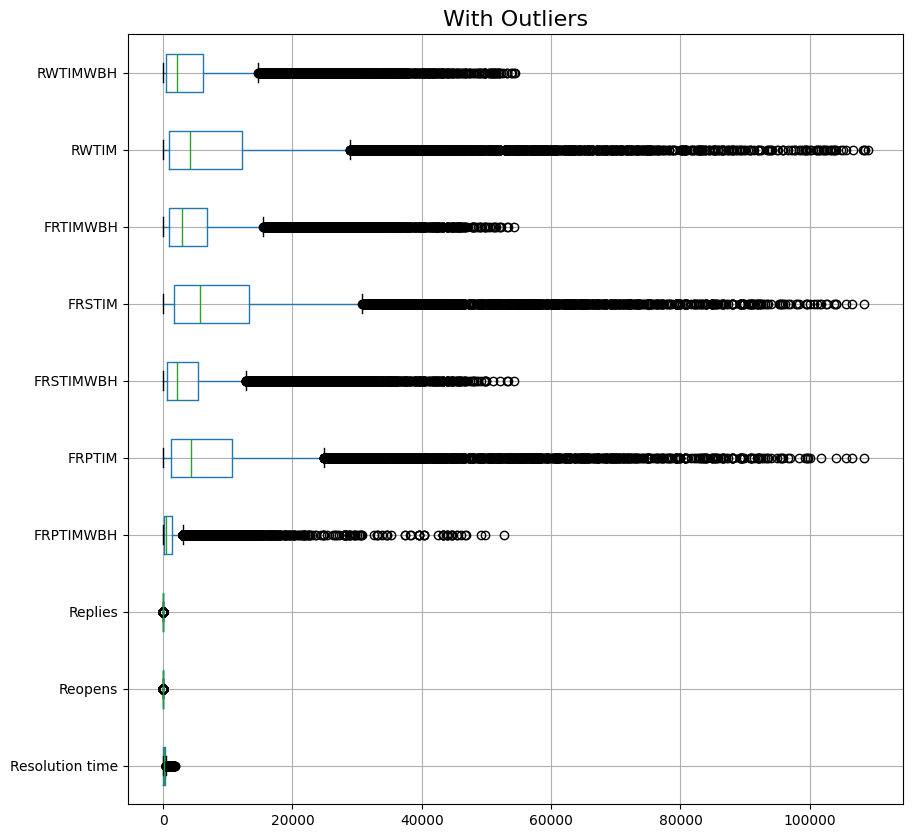

In [47]:
cont=df_median.dtypes[(df_median.dtypes!='uint8') & (df_median.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_median[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [108]:
df_median.to_csv('df_median_with_outlier.csv', index=False)

## Outlier Treatment for Median

In [48]:
df_median_o = df_median.copy()

In [49]:
remove_outlier(df_median_o)

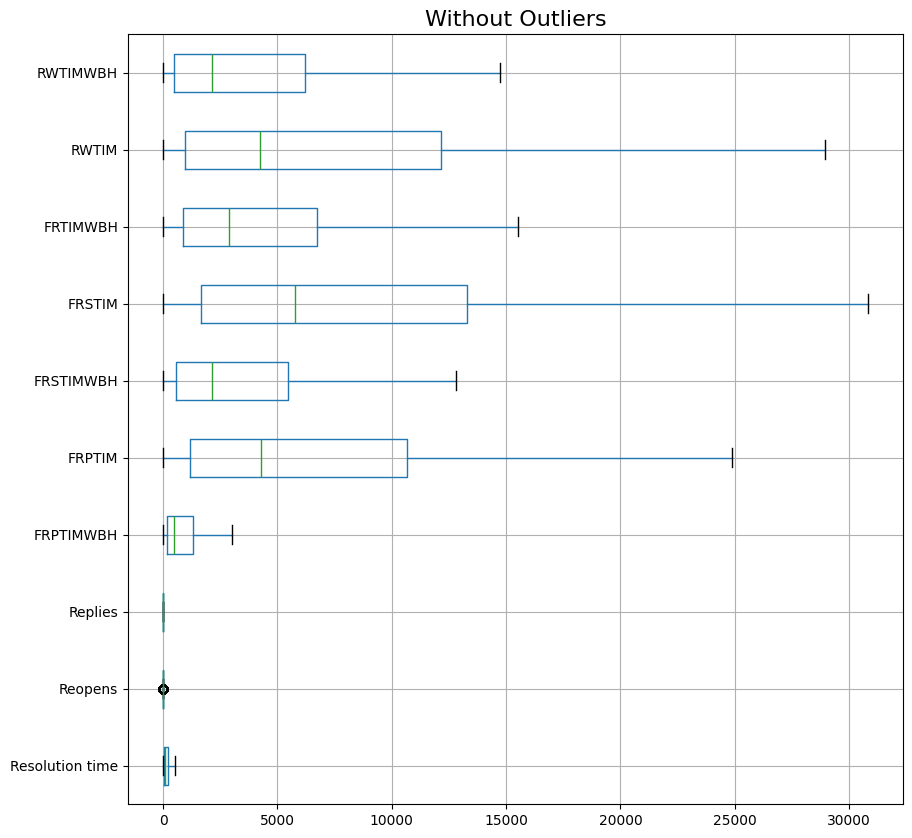

In [51]:
cont=df_median_o.dtypes[(df_median_o.dtypes!='uint8') & (df_median_o.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_median_o[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [107]:
df_median_o.to_csv('df_median_withuot_outlier.csv', index=False)

## Scaling

In [61]:
df_median_O = df_median_o.drop(['Group','Status','Priority','Via','Satisfaction Score','MTOC'],
                             axis=1).apply(lambda x:(x-x.min())/(x.max()-x.min()))

df_median_O['Group'] = df_median_o['Group']
df_median_O['Status'] = df_median_o['Status']
df_median_O['Priority'] = df_median_o['Priority']
df_median_O['Via'] = df_median_o['Via']
df_median_O['Satisfaction Score'] = df_median_o['Satisfaction Score']
df_median_O['MTOC'] = df_median_o['MTOC']

In [62]:
df_median_O.head()

,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,Reopens,Replies,FRPTIMWBH,FRPTIM,...,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,Group,Status,Priority,Via,Satisfaction Score,MTOC
0,0.128725,0.930832,0.104976,0.104989,0.940669,1.00000,1.000000,1.0,0.057561,0.521629,...,1.000000,1.000000,0.616652,0.577806,Support,Solved,Low,Mail,Offered,Is my treatment covered (IMTC)
1,0.390252,0.945688,0.314381,0.314421,0.699683,1.00000,0.909091,1.0,0.508069,0.119965,...,1.000000,1.000000,1.000000,1.000000,Reimbursement Claims,Closed,Low,Mail,Offered,Not Fill
2,0.749863,0.708101,0.593710,0.593785,0.749617,0.64723,0.909091,1.0,0.020296,0.062837,...,0.648944,0.638477,0.245756,0.226278,Support,Solved,Low,Mail,4,Claims
3,0.204028,0.948337,0.158768,0.158788,0.955685,1.00000,0.818182,1.0,0.126768,0.116105,...,1.000000,1.000000,0.629363,0.637853,Support,Solved,Low,Mail,Offered,Claims
4,0.386026,0.843429,0.343023,0.303236,0.611959,1.00000,0.818182,1.0,0.012311,0.001487,...,1.000000,1.000000,0.256532,0.271941,Support,Closed,Low,Mail,4,Claims


## KNN

In [69]:
df_knn = df_1.copy()

In [72]:
df_knn.drop(['Created at','Updated at','Assigned at','Initially assigned at','Solved at'],axis=1,inplace=True)

In [74]:
df_knn = pd.get_dummies(df_knn,columns=['Group','Status','Priority','Via','Satisfaction Score','MTOC'],drop_first=True,dtype=float)

In [75]:
df_knn_o = df_knn.copy()

In [76]:
df_knn.head()

,Resolution time,Reopens,Replies,FRPTIMWBH,FRPTIM,FRSTIMWBH,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,...,MTOC_Health Benefits,MTOC_Health ID,MTOC_Is my treatment covered (IMTC),MTOC_Manage dependents,MTOC_Network or Blacklisted Hospitals,MTOC_Not Applicable,MTOC_Not Fill,MTOC_Others,MTOC_Super Top-up (STU),MTOC_Telehealth
0,1604.0,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,765.0,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,333.0,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1522.0,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,605.0,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df_knn.isnull().sum()

Resolution time                          1968
Reopens                                     0
Replies                                     0
FRPTIMWBH                                3593
FRPTIM                                   1543
FRSTIMWBH                                1543
FRSTIM                                   1968
FRTIMWBH                                 1968
RWTIM                                      56
RWTIMWBH                                   56
Group_Onboardings                           0
Group_Reimbursement Claims                  0
Group_Support                               0
Status_Hold                                 0
Status_New                                  0
Status_Open                                 0
Status_Pending                              0
Status_Solved                               0
Priority_Normal                             0
Priority_Urgent                             0
Via_Internal Communication                  0
Via_Mail                          

In [78]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [79]:
df_knn.isnull().sum()

Resolution time                          0
Reopens                                  0
Replies                                  0
FRPTIMWBH                                0
FRPTIM                                   0
FRSTIMWBH                                0
FRSTIM                                   0
FRTIMWBH                                 0
RWTIM                                    0
RWTIMWBH                                 0
Group_Onboardings                        0
Group_Reimbursement Claims               0
Group_Support                            0
Status_Hold                              0
Status_New                               0
Status_Open                              0
Status_Pending                           0
Status_Solved                            0
Priority_Normal                          0
Priority_Urgent                          0
Via_Internal Communication               0
Via_Mail                                 0
Via_OutBound                             0
Satisfactio

In [80]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn_o)
df_knn_o = pd.DataFrame(data = df_imputed,columns=df_knn_o.columns)

In [81]:
df_knn_o.isnull().sum()

Resolution time                          0
Reopens                                  0
Replies                                  0
FRPTIMWBH                                0
FRPTIM                                   0
FRSTIMWBH                                0
FRSTIM                                   0
FRTIMWBH                                 0
RWTIM                                    0
RWTIMWBH                                 0
Group_Onboardings                        0
Group_Reimbursement Claims               0
Group_Support                            0
Status_Hold                              0
Status_New                               0
Status_Open                              0
Status_Pending                           0
Status_Solved                            0
Priority_Normal                          0
Priority_Urgent                          0
Via_Internal Communication               0
Via_Mail                                 0
Via_OutBound                             0
Satisfactio

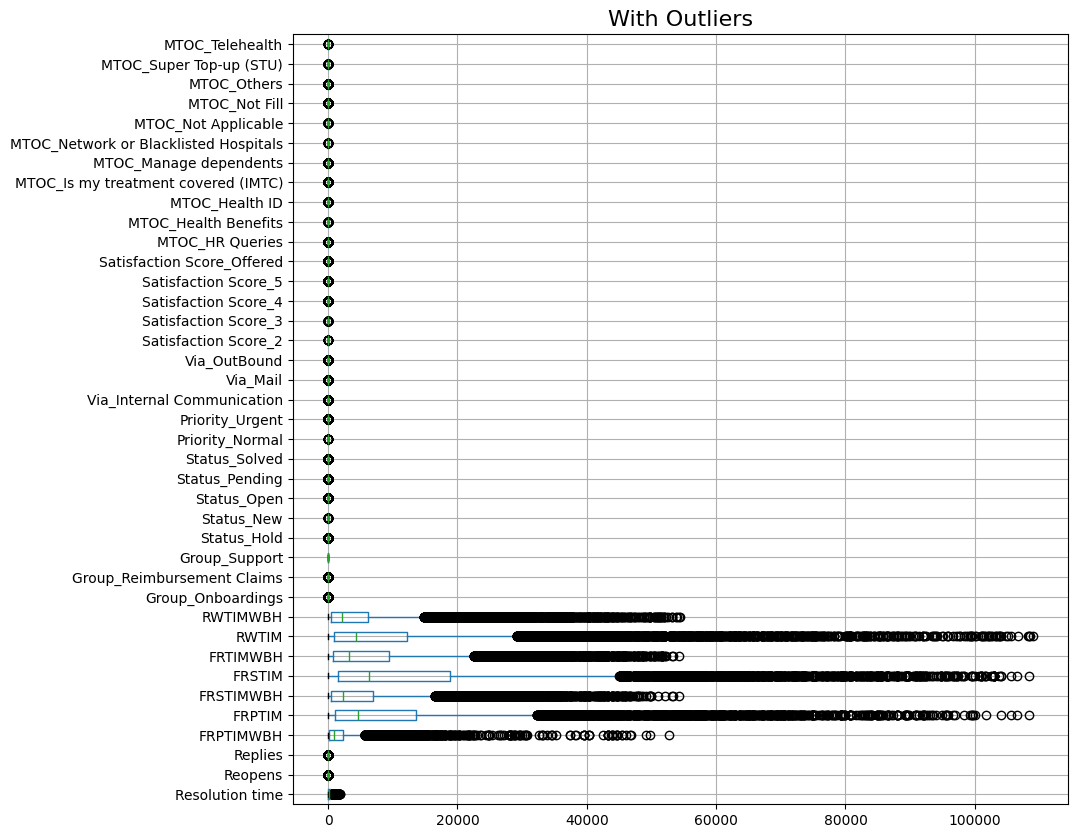

In [82]:
plt.figure(figsize=(10,10))
df_knn.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

## Outlier Treatment on KNN

In [83]:
def outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

def remove_outlier_knn(data):
    for column in data.columns:
        lr,ur=outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

In [84]:
remove_outlier_knn(df_knn_o)

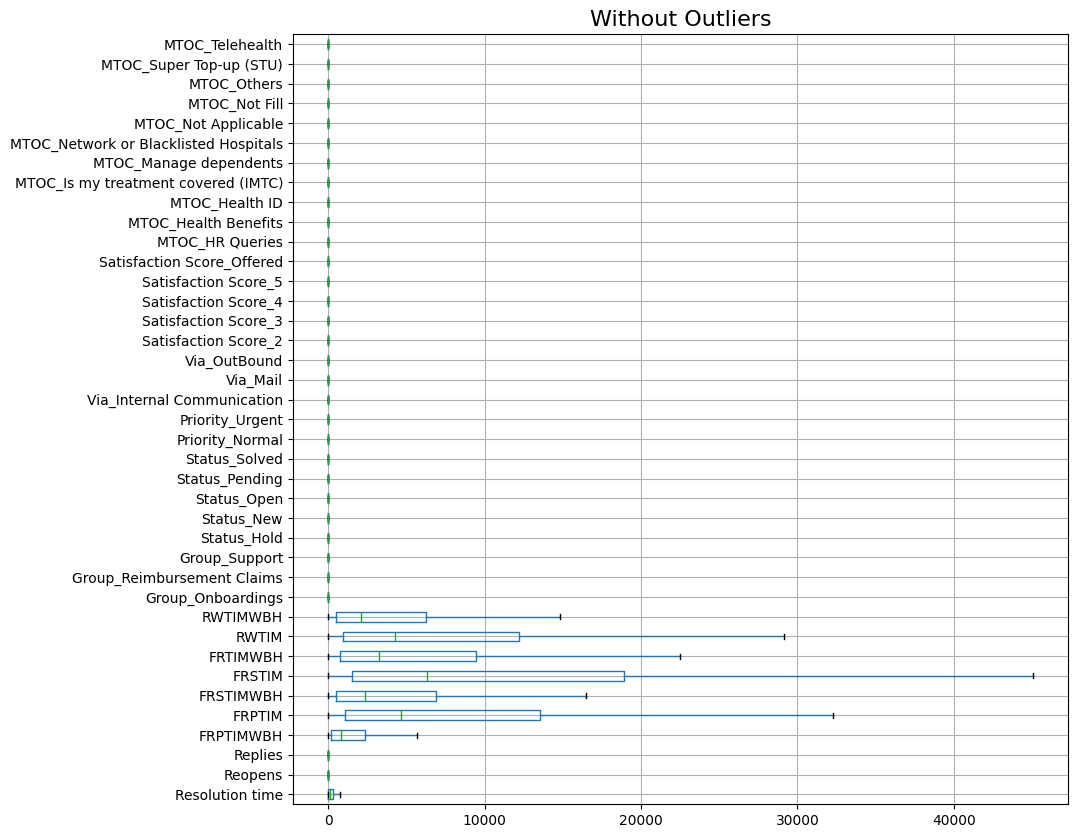

In [85]:
plt.figure(figsize=(10,10))
df_knn_o.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [87]:
df_knn_O = df_knn_o[['Resolution time','Replies','FRPTIMWBH','FRPTIM','FRSTIMWBH','FRSTIM','FRTIMWBH','RWTIM',
                     'RWTIMWBH','Group_Support']].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [89]:
columns = ['Reopens','Group_Onboardings','Group_Reimbursement Claims','Status_Hold','Status_New','Status_Open','Status_Pending','Status_Solved',
           'Priority_Normal','Priority_Urgent','Via_Internal Communication','Via_Mail','Via_OutBound','Satisfaction Score_2','Satisfaction Score_3',
           'Satisfaction Score_4','Satisfaction Score_5','Satisfaction Score_Offered','MTOC_HR Queries','MTOC_Health Benefits',
           'MTOC_Health ID','MTOC_Is my treatment covered (IMTC)','MTOC_Manage dependents','MTOC_Network or Blacklisted Hospitals', 
           'MTOC_Not Applicable','MTOC_Not Fill','MTOC_Others','MTOC_Super Top-up (STU)','MTOC_Telehealth']
for column in columns:
    df_knn_O[column] = df_knn_o[column]


In [91]:
df_knn_O.columns

Index(['Resolution time', 'Replies', 'FRPTIMWBH', 'FRPTIM', 'FRSTIMWBH',
       'FRSTIM', 'FRTIMWBH', 'RWTIM', 'RWTIMWBH', 'Group_Support', 'Reopens',
       'Group_Onboardings', 'Group_Reimbursement Claims', 'Status_Hold',
       'Status_New', 'Status_Open', 'Status_Pending', 'Status_Solved',
       'Priority_Normal', 'Priority_Urgent', 'Via_Internal Communication',
       'Via_Mail', 'Via_OutBound', 'Satisfaction Score_2',
       'Satisfaction Score_3', 'Satisfaction Score_4', 'Satisfaction Score_5',
       'Satisfaction Score_Offered', 'MTOC_HR Queries', 'MTOC_Health Benefits',
       'MTOC_Health ID', 'MTOC_Is my treatment covered (IMTC)',
       'MTOC_Manage dependents', 'MTOC_Network or Blacklisted Hospitals',
       'MTOC_Not Applicable', 'MTOC_Not Fill', 'MTOC_Others',
       'MTOC_Super Top-up (STU)', 'MTOC_Telehealth'],
      dtype='object')

In [90]:
df_knn_O.head()

,Resolution time,Replies,FRPTIMWBH,FRPTIM,FRSTIMWBH,FRSTIM,FRTIMWBH,RWTIM,RWTIMWBH,Group_Support,...,MTOC_Health Benefits,MTOC_Health ID,MTOC_Is my treatment covered (IMTC),MTOC_Manage dependents,MTOC_Network or Blacklisted Hospitals,MTOC_Not Applicable,MTOC_Not Fill,MTOC_Others,MTOC_Super Top-up (STU),MTOC_Telehealth
0,1.000000,1.0,0.030592,0.402407,0.393952,1.000000,1.000000,0.612915,0.574106,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.000000,1.0,0.270027,0.092546,0.092720,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.444000,1.0,0.010787,0.048475,0.051187,0.443944,0.440470,0.244267,0.224829,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,1.0,0.067374,0.089568,0.087923,1.000000,1.000000,0.625549,0.633768,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.806667,1.0,0.006543,0.001148,0.002247,0.806129,0.788207,0.254978,0.270199,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def linear_regession(data):
    X = data.drop('Resolution time', axis=1)
    # Copy target into the y dataframe. 
    y = data[['Resolution time']]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

    # Linear regression Model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    data_train = pd.concat([X_train, y_train], axis=1)
    data_test = pd.concat([X_test,y_test],axis=1)

    return round(regression_model.score(X_train, y_train),2),data_train,data_test

In [94]:
score,data_train,data_test = linear_regession(df_knn)
print("df_knn Model Score :",score)

df_knn Model Score : 1.0


In [95]:
score,data_train_O,data_test_O = linear_regession(df_knn_O)
print("df_knn Model Score :",score)

df_knn Model Score : 1.0


In [97]:
data_train_O.rename(columns={'Group_Reimbursement Claims':'Group_Reimbursement_Claims','Via_Internal Communication':'Via_Internal_Communication',
       'Satisfaction Score_2':'Satisfaction_Score_2','Satisfaction Score_3':'Satisfaction_Score_3','Satisfaction Score_4':'Satisfaction_Score_4', 
       'Satisfaction Score_5':'Satisfaction_Score_5','Satisfaction Score_Offered':'Satisfaction_Score_Offered', 'MTOC_HR Queries':'MTOC_HR_Queries',
       'MTOC_Health Benefits':'MTOC_Health_Benefits', 'MTOC_Health ID':'MTOC_Health_ID','MTOC_Is my treatment covered (IMTC)':'MTOC_Is_IMTC', 
       'MTOC_Manage dependents':'MTOC_Manage_dependents','MTOC_Network or Blacklisted Hospitals':'MTOC_Network_BH','MTOC_Not Applicable':'MTOC_Not_Applicable',
       'MTOC_Not Fill':'MTOC_Not_Fill','MTOC_Super Top-up (STU)':'MTOC_STU','Resolution time':'Resolution_time'},inplace=True)

In [98]:
data_train_O.columns

Index(['Replies', 'FRPTIMWBH', 'FRPTIM', 'FRSTIMWBH', 'FRSTIM', 'FRTIMWBH',
       'RWTIM', 'RWTIMWBH', 'Group_Support', 'Reopens', 'Group_Onboardings',
       'Group_Reimbursement_Claims', 'Status_Hold', 'Status_New',
       'Status_Open', 'Status_Pending', 'Status_Solved', 'Priority_Normal',
       'Priority_Urgent', 'Via_Internal_Communication', 'Via_Mail',
       'Via_OutBound', 'Satisfaction_Score_2', 'Satisfaction_Score_3',
       'Satisfaction_Score_4', 'Satisfaction_Score_5',
       'Satisfaction_Score_Offered', 'MTOC_HR_Queries', 'MTOC_Health_Benefits',
       'MTOC_Health_ID', 'MTOC_Is_IMTC', 'MTOC_Manage_dependents',
       'MTOC_Network_BH', 'MTOC_Not_Applicable', 'MTOC_Not_Fill',
       'MTOC_Others', 'MTOC_STU', 'MTOC_Telehealth', 'Resolution_time'],
      dtype='object')

In [101]:
expr = 'Resolution_time ~ Replies + FRPTIMWBH + FRPTIM + FRSTIMWBH + FRSTIM + FRTIMWBH + RWTIM + RWTIMWBH + \
       Group_Support + Reopens + Group_Onboardings + Group_Reimbursement_Claims + Status_Hold + Status_New + \
       Status_Open + Status_Pending + Status_Solved + Priority_Normal + Priority_Urgent + Via_Internal_Communication + \
       Via_Mail + Via_OutBound + Satisfaction_Score_2 + Satisfaction_Score_3 + Satisfaction_Score_4 + Satisfaction_Score_5 + \
       Satisfaction_Score_Offered + MTOC_HR_Queries + MTOC_Health_Benefits + MTOC_Health_ID + MTOC_Is_IMTC + \
       MTOC_Manage_dependents + MTOC_Network_BH + MTOC_Not_Applicable + MTOC_Not_Fill + MTOC_Others + MTOC_STU + MTOC_Telehealth'

In [102]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train_O).fit()
lm1.params

Intercept                     4.361952e+08
Replies                       8.071831e-06
FRPTIMWBH                     2.567440e-05
FRPTIM                        7.512915e-03
FRSTIMWBH                    -7.415447e-03
FRSTIM                        9.864836e-01
FRTIMWBH                      1.366022e-02
RWTIM                         2.439632e-03
RWTIMWBH                     -2.371953e-03
Group_Support                 4.295927e-06
Reopens                       0.000000e+00
Group_Onboardings             0.000000e+00
Group_Reimbursement_Claims    0.000000e+00
Status_Hold                   0.000000e+00
Status_New                    0.000000e+00
Status_Open                   0.000000e+00
Status_Pending                0.000000e+00
Status_Solved                 0.000000e+00
Priority_Normal               0.000000e+00
Priority_Urgent               0.000000e+00
Via_Internal_Communication    0.000000e+00
Via_Mail                     -1.453984e+08
Via_OutBound                  0.000000e+00
Satisfactio